<a href="https://colab.research.google.com/github/Suryanshagarwal30/Deeplearning_lab/blob/main/Copy_of_Lab_Assignmnent_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Lab Assignment -YOLO 11 Model

**Course Name:** [Enter Course Name]

**Lab Title:** Yolo11 -Model-Application Name(Custom Dataset should be Different for each group)

**Student Name:**[Enter Your Name]

**Student ID:**[Enter Your ID]

**Date of Submission:** [Enter Date]

**Group Members**: [Enter Names]


**Objective**
The purpose of this lab is to understand and implement YOLOv11 for real-time object detection. Students will perform dataset preparation, model implementation, inference, and performance evaluation.




**Task 1: Environment Setup and YOLOv11 Installation**

Objective: Set up the required libraries and dependencies to run YOLOv11.

**Instructions:**

1. Install Python and required libraries (PyTorch, OpenCV, Ultralytics, etc.).
2. Install YOLOv11 from the official repository.
3. Verify the installation by running a sample script.
4. **Expected Outcome:** A functional YOLOv11 environment ready for experimentation.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

100%|██████████| 5.35M/5.35M [00:00<00:00, 102MB/s]


100%|██████████| 49.2k/49.2k [00:00<00:00, 10.6MB/s]


image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 79.6ms
Speed: 15.4ms preprocess, 79.6ms inference, 353.3ms postprocess per image at shape (1, 3, 384, 640)


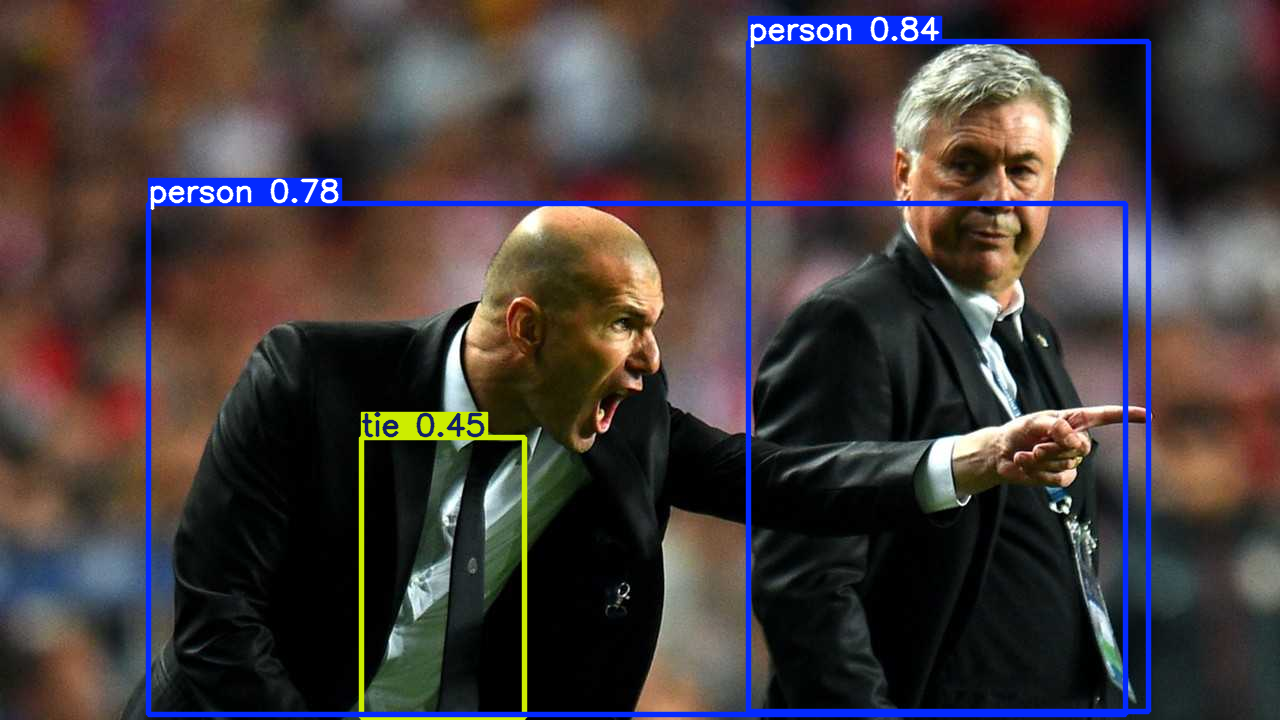

In [1]:
# Code Task 1
# Install YOLOv11 and required dependencies
!pip install ultralytics
from ultralytics import YOLO
# Load a pre-trained YOLOv11 model
model = YOLO('yolo11n.pt')
# Test inference on a sample image
results = model('https://ultralytics.com/images/zidane.jpg')
results[0].show() # Display result

**Task 2: Dataset Preparation & Preprocessing**
Objective: Load and preprocess a dataset for object detection.

Instructions:

1. Choose a Dataset – Use COCO, Pascal VOC, or a custom dataset.
2. Annotate Images – If using a custom dataset, label objects using Roboflow or LabelImg.
3. Convert Annotations – Use Roboflow to export the dataset in YOLO format.
4. Download the Dataset – Use the Roboflow API to fetch the dataset.
5. Split the Dataset – Divide into train (80%), validation (10%), and test (10%).
5. **Expected Outcome:** A well-structured dataset in YOLO format.




In [3]:
#Code for Task. 2
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4igH9yKYtQRbc6bJJM5l")
project = rf.workspace("suryansh-agarwal-s90rd").project("csgo-train-yolo-v5-wwxpo")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 131.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to CSGO-TRAIN-YOLO-V5-1 in yolov11:: 100%|██████████| 4866/4866 [00:00<00:00, 6892.79it/s]



**Task 3: Training YOLOv11 Model**
Objective: Train YOLOv11 on the prepared dataset.

Instructions:

1. Configure the training parameters (batch size, epochs, learning rate).
2. Train the YOLOv11 model using the dataset.
3. Monitor training progress (loss, accuracy, mAP).
4. Save the trained model weights.
5. Expected Outcome: A trained YOLOv11 model ready for inference.






In [4]:
#code for task 3
# Train the model
model.train(
    data="/content/CSGO-TRAIN-YOLO-V5-1/data.yaml",  # path to your data.yaml
    epochs=30,              # number of epochs
    batch=16,               # batch size
    imgsz=640,              # image size
    lr0=0.01,               # initial learning rate
    name="yolo11_csgo"      # name of the training run
)


Ultralytics 8.3.111 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/CSGO-TRAIN-YOLO-V5-1/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo11_csgo, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 755k/755k [00:00<00:00, 24.4MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/CSGO-TRAIN-YOLO-V5-1/train/labels... 1774 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1774/1774 [00:00<00:00, 2411.63it/s]

train: New cache created: /content/CSGO-TRAIN-YOLO-V5-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 812.0±483.2 MB/s, size: 54.3 KB)


val: Scanning /content/CSGO-TRAIN-YOLO-V5-1/valid/labels... 446 images, 0 backgrounds, 0 corrupt: 100%|██████████| 446/446 [00:00<00:00, 1218.12it/s]

val: New cache created: /content/CSGO-TRAIN-YOLO-V5-1/valid/labels.cache


Plotting labels to runs/detect/yolo11_csgo/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo11_csgo
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.27G      2.249      3.995      1.913         43        640: 100%|██████████| 111/111 [00:36<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.82it/s]

                   all        446        566      0.642      0.356       0.26      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.66G      1.727      2.391      1.413         38        640: 100%|██████████| 111/111 [00:34<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.66it/s]

                   all        446        566      0.887      0.426      0.514      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.66G      1.654      1.827      1.359         30        640: 100%|██████████| 111/111 [00:34<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.88it/s]

                   all        446        566      0.835      0.431      0.498      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.66G      1.594      1.512      1.335         33        640: 100%|██████████| 111/111 [00:32<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.69it/s]

                   all        446        566      0.931      0.503      0.579      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.66G      1.545      1.283      1.289         27        640: 100%|██████████| 111/111 [00:32<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.04it/s]

                   all        446        566      0.901       0.52      0.566      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.66G      1.523      1.147      1.269         27        640: 100%|██████████| 111/111 [00:32<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.03it/s]

                   all        446        566       0.92      0.556      0.599      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.66G       1.46      1.063      1.242         27        640: 100%|██████████| 111/111 [00:33<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.94it/s]

                   all        446        566      0.946       0.57      0.607      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.66G      1.481       1.05      1.244         28        640: 100%|██████████| 111/111 [00:32<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.90it/s]

                   all        446        566       0.96      0.571      0.613      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.66G      1.452     0.9858      1.238         25        640: 100%|██████████| 111/111 [00:32<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.79it/s]

                   all        446        566      0.956      0.572       0.62      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.66G      1.431     0.9446      1.224         31        640: 100%|██████████| 111/111 [00:32<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.89it/s]

                   all        446        566      0.955      0.565      0.616      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.66G      1.431     0.9431      1.223         24        640: 100%|██████████| 111/111 [00:32<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.69it/s]

                   all        446        566      0.954      0.573      0.638      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.66G      1.409     0.9235      1.206         34        640: 100%|██████████| 111/111 [00:33<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.26it/s]

                   all        446        566      0.966      0.592      0.622      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.66G      1.388     0.8848      1.197         34        640: 100%|██████████| 111/111 [00:31<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.24it/s]

                   all        446        566      0.965      0.594      0.625      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.66G      1.368     0.8638      1.187         17        640: 100%|██████████| 111/111 [00:31<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.02it/s]

                   all        446        566      0.955      0.589      0.623      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.66G      1.359     0.8537      1.185         30        640: 100%|██████████| 111/111 [00:32<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.91it/s]

                   all        446        566      0.972      0.593      0.628      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.66G      1.337     0.8207      1.169         25        640: 100%|██████████| 111/111 [00:32<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.66it/s]

                   all        446        566      0.966      0.598      0.648      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.66G      1.309     0.8031      1.154         23        640: 100%|██████████| 111/111 [00:32<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.08it/s]

                   all        446        566      0.974      0.594      0.634        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.66G      1.306     0.7988      1.151         25        640: 100%|██████████| 111/111 [00:31<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.70it/s]

                   all        446        566      0.961      0.602      0.634      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.66G      1.306       0.77       1.15         24        640: 100%|██████████| 111/111 [00:32<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.03it/s]

                   all        446        566      0.975      0.606      0.637      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.66G      1.304     0.7693      1.151         27        640: 100%|██████████| 111/111 [00:32<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.75it/s]

                   all        446        566      0.971      0.603      0.636      0.416


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.66G      1.241     0.6566      1.118         18        640: 100%|██████████| 111/111 [00:32<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.52it/s]

                   all        446        566      0.981      0.615      0.635      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.66G      1.214     0.6165      1.103         19        640: 100%|██████████| 111/111 [00:31<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.18it/s]

                   all        446        566      0.982      0.604      0.634      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.66G      1.195     0.6151       1.09         17        640: 100%|██████████| 111/111 [00:30<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.05it/s]

                   all        446        566      0.957      0.611      0.636      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.66G      1.164     0.5913      1.072         16        640: 100%|██████████| 111/111 [00:30<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.90it/s]

                   all        446        566      0.967      0.609      0.636      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.66G      1.155     0.5802      1.067         16        640: 100%|██████████| 111/111 [00:29<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.11it/s]

                   all        446        566      0.965      0.616      0.638       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.66G      1.144     0.5759      1.068         17        640: 100%|██████████| 111/111 [00:29<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.14it/s]

                   all        446        566      0.968      0.625       0.64      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.66G       1.12     0.5634      1.055         16        640: 100%|██████████| 111/111 [00:31<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.45it/s]

                   all        446        566      0.972      0.617       0.64      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.66G      1.111     0.5647       1.05         18        640: 100%|██████████| 111/111 [00:29<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.36it/s]

                   all        446        566      0.971      0.616      0.642      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.66G      1.101      0.559      1.049         16        640: 100%|██████████| 111/111 [00:30<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.00it/s]

                   all        446        566      0.975      0.617      0.642      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.66G      1.084     0.5376       1.04         23        640: 100%|██████████| 111/111 [00:31<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.73it/s]

                   all        446        566      0.973      0.617      0.642      0.439



30 epochs completed in 0.304 hours.
Optimizer stripped from runs/detect/yolo11_csgo/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/yolo11_csgo/weights/best.pt, 5.5MB

Validating runs/detect/yolo11_csgo/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.89it/s]


                   all        446        566      0.973      0.617      0.642      0.439
                    CT        231        286      0.959      0.923      0.963      0.648
                     T        240        278      0.959      0.928      0.955      0.661
                person          2          2          1          0    0.00759    0.00683
Speed: 0.3ms preprocess, 2.6ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/yolo11_csgo


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b4dd1782710>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [5]:
from google.colab import files
files.download('/content/runs/detect/yolo11_csgo/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Task 4:**Model Inference and Evaluation
Objective: Test the trained model on new images and videos.

Instructions:

1.  Load the trained model weights.
2.  Run object detection on test images and videos.
3.  Evaluate the model performance using mAP (mean Average Precision), precision, recall.

✅ Mean Average Precision (mAP@50, mAP@50-95) – Measures model accuracy across different IoU thresholds.

✅ Precision & Recall – Evaluates the tradeoff between false positives and false negatives.

✅ F1 Score – Balances precision and recall for a comprehensive model assessment.

**Discuss the results in detail**
4.  Visualize results with bounding boxes.
5.  Expected Outcome: Detection results with bounding boxes and performance metrics.



**Discussion and Conclusion on Result Analysis** *##Add Text##*



image 1/1 /content/CSGO-TRAIN-YOLO-V5-1/test/images/csgo1628633729906354700_png_jpg.rf.b766e86dc5bf9d5586ca3cdcb71a06a1.jpg: 640x640 2 Ts, 12.8ms
Speed: 2.6ms preprocess, 12.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


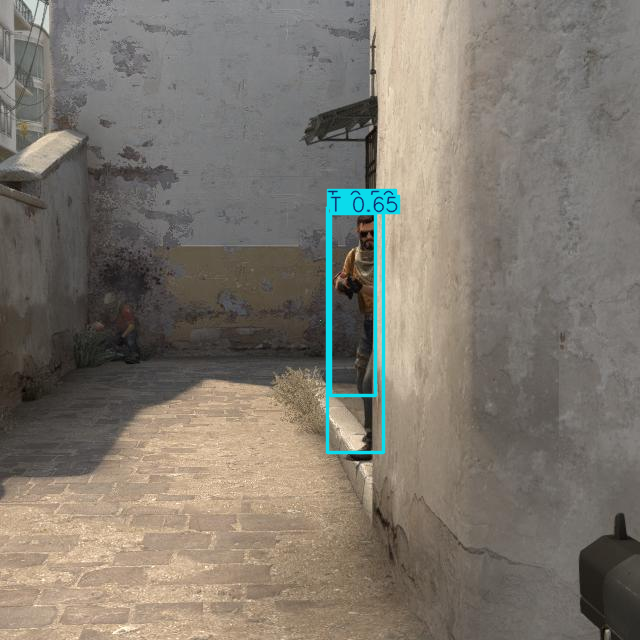

In [9]:
# Code for Task 4
from ultralytics import YOLO

# Load your trained model
model = YOLO('/content/runs/detect/yolo11_csgo/weights/best.pt')  # update with your actual path

# Run inference on a test image from Roboflow dataset
results = model('/content/CSGO-TRAIN-YOLO-V5-1/test/images/csgo1628633729906354700_png_jpg.rf.b766e86dc5bf9d5586ca3cdcb71a06a1.jpg')  # put actual image file name
results[0].show()  # visualize prediction


In [10]:
import os
test_images = os.listdir('/content/CSGO-TRAIN-YOLO-V5-1/test/images')
print(test_images)


['csgo1628698531729120900_png_jpg.rf.f73c2bb09c51711487f91b9b4762d05a.jpg', 'csgo1628698563008344800_png_jpg.rf.cbd91d5c972921633c9db83eb0fc50ff.jpg', 'csgo1628698529419620100_png_jpg.rf.e0627391a82e50e1864c68f099d76371.jpg', 'csgo1628634735134443100_png_jpg.rf.e8003ee602b64d058c3f0a04ffff98a6.jpg', 'csgo1628698536642120900_png_jpg.rf.f9b353440988117a098d385bf246640c.jpg', 'csgo1628698603974343600_png_jpg.rf.d4ce35d8e670f113726f3c2bf61602d7.jpg', 'csgo1628698532954121800_png_jpg.rf.fcfe8ab8ca8d8ae79c12660f9152d12f.jpg', 'csgo1628698527822618900_png_jpg.rf.420a1550237854f1240851f43f90c03d.jpg', 'csgo1628698603881846700_png_jpg.rf.65b14f8bc261c40a0c18c204eb4dcf9f.jpg', 'csgo1628698656038900500_png_jpg.rf.aba19658066db7bc3b52ba674cdc5aba.jpg', 'csgo1628635548444006400_png_jpg.rf.7a73c3d92f85579f0111273f568c18e8.jpg', 'csgo1628634117687826900_png_jpg.rf.9842a4444cba97ed73566e86e064ba82.jpg', 'csgo1628696509682025300_png_jpg.rf.7788427c05b7c2108cd183d3a239e60f.jpg', 'csgo1628698533093120700

In [12]:
model.predict(source='/content/CSGO-TRAIN-YOLO-V5-1/test/images', save=True)



image 1/207 /content/CSGO-TRAIN-YOLO-V5-1/test/images/csgo1628633620560459100_png_jpg.rf.3362c5d2f3cdd7c3e76a44169e1f8720.jpg: 640x640 1 CT, 17.2ms
image 2/207 /content/CSGO-TRAIN-YOLO-V5-1/test/images/csgo1628633620560459100_png_jpg.rf.d4f8c9263e2b089ed44e75ebf44635c2.jpg: 640x640 1 CT, 10.0ms
image 3/207 /content/CSGO-TRAIN-YOLO-V5-1/test/images/csgo1628633713213214800_png_jpg.rf.d702a25e6dc58f63a2c062e14a1e81cf.jpg: 640x640 1 T, 9.7ms
image 4/207 /content/CSGO-TRAIN-YOLO-V5-1/test/images/csgo1628633729906354700_png_jpg.rf.b766e86dc5bf9d5586ca3cdcb71a06a1.jpg: 640x640 2 Ts, 8.7ms
image 5/207 /content/CSGO-TRAIN-YOLO-V5-1/test/images/csgo1628633981720620300_png_jpg.rf.982cd179df84d7d16a962509756acb32.jpg: 640x640 1 T, 9.6ms
image 6/207 /content/CSGO-TRAIN-YOLO-V5-1/test/images/csgo1628633997560903600_png_jpg.rf.a41108e7baae84fe2ef97eb70ce35078.jpg: 640x640 1 T, 9.0ms
image 7/207 /content/CSGO-TRAIN-YOLO-V5-1/test/images/csgo1628634028312018200_png_jpg.rf.910b0956e5838f9350427871d6410

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'CT', 1: 'T', 2: 'person'}
 obb: None
 orig_img: array([[[0, 4, 0],
         [0, 4, 0],
         [0, 4, 0],
         ...,
         [0, 0, 0],
         [0, 0, 1],
         [0, 0, 1]],
 
        [[0, 4, 0],
         [0, 4, 0],
         [0, 4, 0],
         ...,
         [0, 0, 0],
         [0, 0, 1],
         [0, 0, 1]],
 
        [[0, 3, 1],
         [0, 3, 1],
         [0, 3, 1],
         ...,
         [0, 0, 0],
         [0, 0, 1],
         [0, 0, 1]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 1, 2],
         [0, 2, 3],
         [1, 3, 4]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 1],
         [0, 0, 1],
         [0, 1, 2]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 1],
      

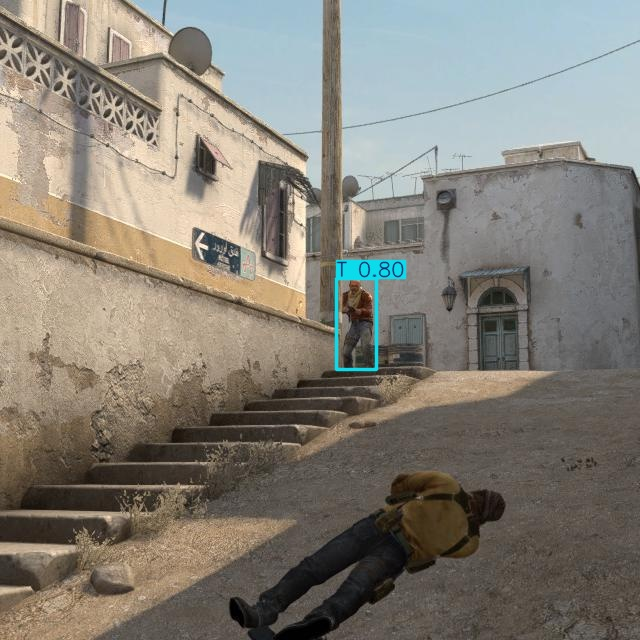

In [14]:
from IPython.display import Image
Image(filename='/content/runs/detect/predict/csgo1628633981720620300_png_jpg.rf.982cd179df84d7d16a962509756acb32.jpg')


**Declaration**

I, [Your Name], confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [Insert GitHub Link]

Signature: [Full Name]

**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion